<a href="https://colab.research.google.com/github/Shnku/pythoning_stuff/blob/proj/NN/test_individually_expr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive

drive.mount("/content/drive")
# shared path to drive
SHARED_PATH = "/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"
# direct path to drive
DIRECT_PATH = "/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"

# Determine the data path based on the existence of shared or direct paths
root_path = (
    SHARED_PATH if os.path.exists(SHARED_PATH)
    else DIRECT_PATH if os.path.exists(DIRECT_PATH)
    else None
)

data_path = ""
# Print the chosen path or an error message
if root_path:
    print(f"Using path: {root_path}")
    data_path = root_path + "/CNC_BuildingClassify_expr1_filtered_data"
    for filename in os.listdir(data_path):
        print(filename)
else:
    print("Neither shared nor direct path exists. Please check the paths.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using path: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours
Training_data
canteen
Untitled
test_individually_expr1.ipynb
Validate_data
Testing_data_mix
resnet18_image_classifier_full.pth
training_expr1.ipynb


In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# Define device (CPU or GPU)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

PATH_TO_PRETRAINED_MODEL = data_path+"/resnet18_image_classifier_full.pth"
print(PATH_TO_PRETRAINED_MODEL)
# classes = ["Administrative", "Chemistry", "Gurudeb", "Heritage", "canteen"]
# ['Administrative_test', 'Chemistry_test', 'Gurudeb_test', 'Heritage_test']
classes = ['admin', 'chemistry', 'gurudeb', 'heritage']


cuda
/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/CNC_BuildingClassify_expr1_filtered_data/resnet18_image_classifier_full.pth


In [ ]:
model = torch.load(PATH_TO_PRETRAINED_MODEL,weights_only=False)

mean = [0.485, 0.456, 0.406]
standev = [0.229, 0.224, 0.225]
px = 224

image_transform = transforms.Compose(
    [
        transforms.Resize((px, px)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(mean), std=(standev)),
    ]
)

In [ ]:
from PIL import Image

def classify(model, img_transform, img_path, classes):
    model.eval()
    # img_path is now the string path to the image file
    input_img = Image.open(input_img_path)
    plt.figure(figsize=(10, 10),dpi=40)
    plt.imshow(input_img)
    img_tensor = img_transform(input_img).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        output = model(img_tensor)
        # You would typically process the output here, e.g., get probabilities and predictions
        probabilities = torch.nn.functional.softmax(output, dim=1)
        print(probabilities)
        _, predicted_class_index = torch.max(probabilities, 1)
        predicted_class = classes[predicted_class_index.item()]
        print(f"Predicted class: {predicted_class}")


tensor([[0.2893, 0.5510, 0.1107, 0.0489]], device='cuda:0')
Predicted class: chemistry
tensor([[0.1817, 0.2216, 0.0994, 0.4973]], device='cuda:0')
Predicted class: heritage
tensor([[0.0179, 0.0083, 0.0153, 0.9585]], device='cuda:0')
Predicted class: heritage


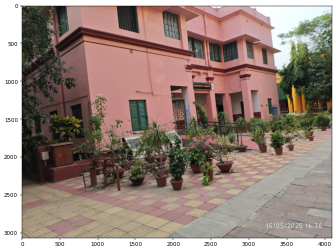

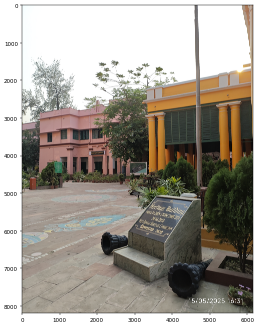

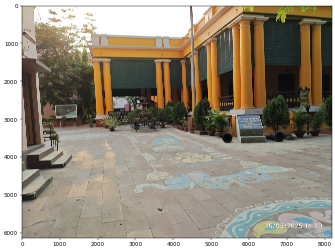

In [ ]:
input_img_path = data_path+"/Testing_data_mix/Chemistry_test/mcb_0004.jpg"
classify(model,image_transform,input_img_path,classes)

input_img_path = data_path+"/Testing_data_mix/Heritage_test/Copy of diagonal_0002.jpg"
classify(model,image_transform,input_img_path,classes)

input_img_path = data_path+"/Testing_data_mix/Heritage_test/fview_0001.jpg"
classify(model,image_transform,input_img_path,classes)
